In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

df = pd.read_csv("../data/advance_cleaned_raw_data.csv")

# Check fully cleaned raw data
print(f"Number of rows and columns: {df.shape}")
df.head()


Number of rows and columns: (354, 20)


,serial,ad_name,ad_set_name,amount_spent,max_roas,scroll_stop_(%),hook_rate_(%),hold_rate_(%),frequency,reach,results,result_rate_(%),cpr,cpc,ctr,3_sec_video,25_play,50_play,75_play,100_play
0,6,ad_id_961,ad_set_093,59.51,0.74,50.64,39.91,20.21,1.25,1061,1,7.51,59.51,1.24,3.61,674,334,215,174,116
1,13,ad_id_1003,ad_set_062,128.88,1.67,47.90,38.49,18.43,1.26,2989,4,10.58,32.22,1.05,3.25,1811,897,555,448,267
2,14,ad_id_886,ad_set_013,120.81,3.27,39.45,45.91,18.11,1.22,2837,8,23.03,15.10,0.93,3.74,1370,756,483,375,242
3,15,ad_id_402,ad_set_004,100.33,2.66,47.41,34.88,16.53,1.26,2896,5,13.71,20.07,0.96,2.88,1729,798,482,378,230
4,27,ad_id_1320,ad_set_065,145.02,1.49,53.18,49.73,26.45,1.45,2635,5,13.09,29.00,1.13,3.35,2031,1181,851,669,415


In [55]:
# Find Winning Ads
class WinningAdSelector:
    def __init__(self, df):
        self.df = df

    def get_winning_ads(self, top_n=10):
        winning = self.df[
            (self.df['amount_spent'] > 100) &
            (self.df['max_roas'] >= 2) &
            (self.df['result_rate_(%)'] > 20) &
            (self.df['scroll_stop_(%)'] > 25) &
            (self.df['hook_rate_(%)'] > 30) &
            (self.df['hold_rate_(%)'] > 10) &
            (self.df['cpr'] <= 20) &
            (self.df['ctr'] > 2) &
            (self.df['cpc'] < 1.5)
        ].copy()
        winning_sorted = winning.sort_values(by='result_rate_(%)', ascending=False).head(top_n)
        selected_cols = ['ad_name', 'amount_spent', 'max_roas', 'result_rate_(%)', 'scroll_stop_(%)', 'hook_rate_(%)', 'hold_rate_(%)', 'ctr', 'cpr', 'cpc']
        return winning_sorted[selected_cols].round(2)  # Keep numbers clean

selector = WinningAdSelector(df)
top_ads = selector.get_winning_ads(top_n=10)

print("Top 10 Winning Videos:")
display(top_ads)

top_ads.to_csv("../data/top_ads.csv", index=False)
print("Data saved successfully.")

Top 10 Winning Videos:


,ad_name,amount_spent,max_roas,result_rate_(%),scroll_stop_(%),hook_rate_(%),hold_rate_(%),ctr,cpr,cpc
194,ad_id_174,125.38,3.22,41.72,35.17,42.97,15.12,3.95,9.64,1.02
193,ad_id_1635,518.19,2.26,30.29,33.21,42.08,13.97,3.45,11.27,0.99
81,ad_id_1345,526.10,2.84,29.73,32.99,49.09,16.19,4.34,15.47,1.06
196,ad_id_803,577.88,2.28,29.50,32.47,42.02,13.64,3.23,11.79,1.08
185,ad_id_26,396.76,2.16,28.56,29.97,40.97,12.28,2.90,11.02,1.09
232,ad_id_645,600.88,2.22,26.70,30.95,39.65,12.27,3.99,12.78,0.85
230,ad_id_794,995.09,2.15,26.68,33.50,42.69,14.30,4.26,15.31,0.96
2,ad_id_886,120.81,3.27,23.03,39.45,45.91,18.11,3.74,15.10,0.93
43,ad_id_383,2189.77,2.39,22.85,32.27,48.93,15.79,4.74,19.55,0.94
214,ad_id_1529,1350.04,2.42,21.62,47.55,35.45,16.85,3.50,11.25,0.69


Data saved successfully.


Feature Importance (Coefficients) for Full Dataset:
           Feature  Coefficient
1         max_roas        10.42
7              cpc         5.76
5              ctr         5.04
2  scroll_stop_(%)         3.80
3    hook_rate_(%)         2.99
0     amount_spent        -0.90
4    hold_rate_(%)        -5.52
6              cpr        -5.99


C:\Users\Asif Mohammad\AppData\Local\Temp\ipykernel_9676\358371723.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


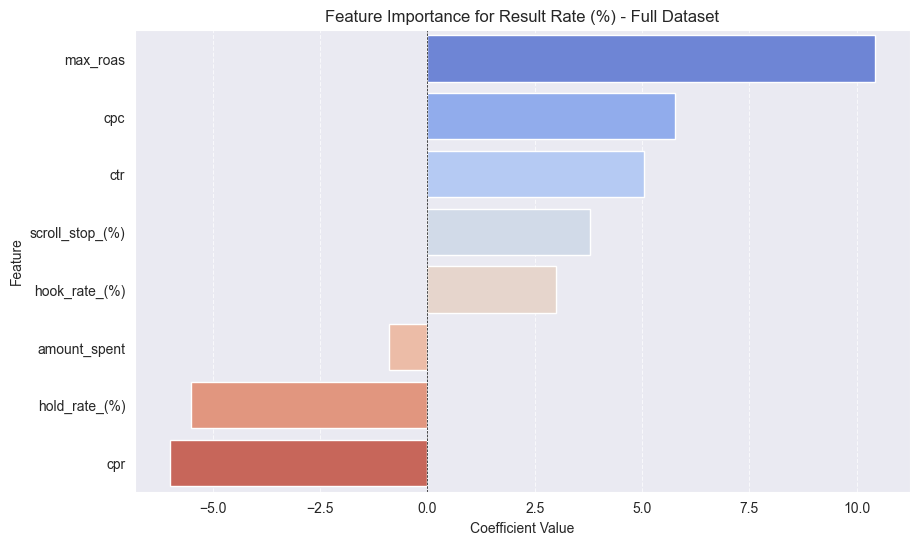

In [56]:
# Linear Regression on full dataset
features = ['amount_spent', 'max_roas', 'scroll_stop_(%)', 'hook_rate_(%)', 'hold_rate_(%)', 'ctr', 'cpr', 'cpc']
target = 'result_rate_(%)'

X = df[features]
y = df[target]

# Handle missing values (optional, remove if not needed)
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit linear regression model
model = LinearRegression()
model.fit(X_scaled, y)

# Get coefficients
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Print coefficients
print("Feature Importance (Coefficients) for Full Dataset:")
print(coef_df.round(2))

# Visualization: Bar chart of coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Feature Importance for Result Rate (%) - Full Dataset')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

In [57]:
# Add interaction terms
df['hook_rate_ctr'] = df['hook_rate_(%)'] * df['ctr']
df['hold_rate_cpr'] = df['hold_rate_(%)'] * df['cpr']

# Features for regression
X = df[['amount_spent', 'result_rate_(%)', 'scroll_stop_(%)', 'hook_rate_ctr', 'hold_rate_cpr', 'cpc']]
y = df['max_roas']

# Add a constant term for intercept
X_with_const = np.c_[np.ones(X.shape[0]), X]  # Adds a column of 1s for the intercept
feature_names = ['Intercept'] + list(X.columns)

# Fit the linear regression model
model = LinearRegression(fit_intercept=False)  # No intercept since we added it manually
model.fit(X_with_const, y)

# Get coefficients and residuals
coefficients = model.coef_
residuals = y - model.predict(X_with_const)
n = X_with_const.shape[0]  # Number of observations
p = X_with_const.shape[1]  # Number of predictors (including intercept)

# Calculate standard errors using residuals
sigma_squared = np.sum(residuals**2) / (n - p)
var_beta = np.diag(sigma_squared * np.linalg.inv(np.dot(X_with_const.T, X_with_const)))
std_errors = np.sqrt(var_beta)

# Perform t-test for each coefficient
t_statistics = coefficients / std_errors
p_values = [2 * (1 - stats.t.cdf(np.abs(t), n - p)) for t in t_statistics]

# Summary of hypothesis test results
hypothesis_results = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Std_Error': std_errors,
    't_statistic': t_statistics,
    'p_value': p_values
})
print(hypothesis_results)

           Feature  Coefficient  Std_Error  t_statistic   p_value
0        Intercept     3.131440   0.644052     4.862095  0.000002
1     amount_spent     0.000020   0.000057     0.345803  0.729700
2  result_rate_(%)     0.109493   0.007083    15.458311  0.000000
3  scroll_stop_(%)    -0.013941   0.011971    -1.164555  0.244999
4    hook_rate_ctr    -0.008493   0.002679    -3.170748  0.001656
5    hold_rate_cpr     0.000163   0.000513     0.317276  0.751225
6              cpc    -1.394034   0.324412    -4.297109  0.000023
